# Clingraph package quick start with Jupyter

We present in this notebook the basic functionalities of clingraph used as a package.

- Try it yourself! Launch this notebook in Binder [![Binder](https://camo.githubusercontent.com/341e1df8d8fb38ce41d9c5987436b754534d52f17b7e10b070a4479bdd548867/68747470733a2f2f676b652e6d7962696e6465722e6f72672f7374617469632f696d616765732f62616467655f6c6f676f2e7376673f763d3131373739336162373635323430343665663434653264326435616632323063)](https://mybinder.org/v2/gh/potassco/clingraph/master?labpath=notebook.ipynb)

- We suggest that the user first gets familiarized with the accepted :speech_balloon: [syntax](https://clingraph.readthedocs.io/en/latest/clingraph/syntax.html).

- The details on the package options are in :books: [api documentation](https://clingraph.readthedocs.io/en/latest/clingraph/api.html#clingraph).



- For the command line usage see our [command line documentation](https://clingraph.readthedocs.io/en/latest/clingraph/console.html#). 
- Our [examples folder](https://github.com/potassco/clingraph/tree/master/examples) contains all the range of functionalities in different applications (*Each subfolder contains a README that explains how to run it*). 

## Python package functionality

### Load facts

We use the `Factbase` class to gather all the facts defining the graphs

In [1]:
from clingraph.orm import Factbase

#### Create a factbase from string

Loads a string of facts

In [2]:
fb = Factbase()
fb.add_fact_string('''
node(oscar). 
node(andres). 
edge((oscar,andres)). 
attr(node,andres,label,"Andres").
attr(node,oscar,label,"Oscar").
attr(edge,(oscar,andres),label,"friends").''')

Show the facts after preprocessing

In [3]:
print(fb)

node(oscar,default).
node(andres,default).
attr(node,andres,(label,-1),"Andres").
attr(node,oscar,(label,-1),"Oscar").
attr(edge,(oscar,andres),(label,-1),"friends").
edge((oscar,andres),default).
graph(default).



#### Create a Factbase from file

The file contents representing two different graphs.

In [4]:
!cat examples/doc/example2/example2.lp

cat: examples/docxample2/example2.lp: No such file or directory


##### Load the facts in the file

In [5]:
fb = Factbase()
fb.add_fact_file("examples/doc/example2/example2.lp")

##### Add additional facts

In [6]:
fb.add_fact_string("attr(graph_nodes,toms_family,color,red).attr(graph_nodes,bills_family,color,blue).")

Show all the facts

In [7]:
print(fb)

graph(toms_family).
graph(bills_family).
edge((tom,max),toms_family).
edge((bill,jen),bills_family).
node(tom,toms_family).
node(max,toms_family).
node(bill,bills_family).
node(jen,bills_family).
attr(graph_nodes,bills_family,(color,-1),blue).
attr(graph_nodes,toms_family,(color,-1),red).



### Graphviz functionality

#### Compute the graphs

In [8]:
from clingraph.graphviz import compute_graphs

Computes the [graphviz objects](https://graphviz.readthedocs.io/en/stable/) by calling `compute_graphs(fb)`.

In [9]:
graphs = compute_graphs(fb)

Show the cligraph objects

In [10]:
print(graphs)

{'toms_family': <graphviz.graphs.Graph object at 0x10fadae60>, 'bills_family': <graphviz.graphs.Graph object at 0x10fadb010>}


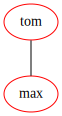

In [11]:
graphs['toms_family']

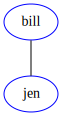

In [12]:
graphs['bills_family']

#### Get the source code

This source code uses the [DOT Language](https://graphviz.org/doc/info/lang.html)

In [13]:
from clingraph.graphviz import dot

In [14]:
dot_graphs = dot(graphs)
dot_graphs

{'toms_family': 'graph toms_family {\n\tnode [color=red]\n\ttom\n\tmax\n\ttom -- max\n}\n',
 'bills_family': 'graph bills_family {\n\tnode [color=blue]\n\tbill\n\tjen\n\tbill -- jen\n}\n'}

In [15]:
print(dot_graphs['toms_family'])

graph toms_family {
	node [color=red]
	tom
	max
	tom -- max
}



##### Write the dot in files

Writes in one file per graph

In [17]:
from clingraph.utils import write

In [18]:
write(dot_graphs,directory="out",format="dot",name_format="source_{graph_name}")

File saved in out/source_toms_family.dot
File saved in out/source_bills_family.dot


#### Render the graphs

We use IPython here only to display the output

In [19]:
from IPython.display import Image

In [20]:
from clingraph.graphviz import render

In [21]:
render(graphs,format="png")

Image saved in out/toms_family.png
Image saved in out/bills_family.png


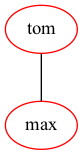

In [22]:
Image("out/toms_family.png")

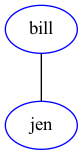

In [23]:
Image("out/bills_family.png")

#### Create a gif

In [24]:
from clingraph.graphviz.imageio import save_gif

In [25]:
save_gif(graphs)

Image saved in out/images/gif_image_toms_family_0.png
Image saved in out/images/gif_image_bills_family_0.png
Gif saved in out/movie.gif


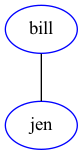

In [26]:
Image("out/movie.gif")

#### Generate latex code

In [27]:
from clingraph.graphviz.tex import tex

In [28]:
tex_graphs=tex(graphs)
tex_graphs

{'toms_family': "\\documentclass{article}\n\\usepackage[x11names, svgnames, rgb]{xcolor}\n\\usepackage[utf8]{inputenc}\n\\usepackage{tikz}\n\\usetikzlibrary{snakes,arrows,shapes}\n\\usepackage{amsmath}\n%\n%\n\n%\n\n%\n\n\\begin{document}\n\\pagestyle{empty}\n%\n%\n%\n\n\\enlargethispage{100cm}\n% Start of code\n% \\begin{tikzpicture}[anchor=mid,>=latex',line join=bevel,]\n\\begin{tikzpicture}[>=latex',line join=bevel,]\n  \\pgfsetlinewidth{1bp}\n%%\n\\pgfsetcolor{black}\n  % Edge: tom -- max\n  \\draw [] (27.0bp,71.697bp) .. controls (27.0bp,60.846bp) and (27.0bp,46.917bp)  .. (27.0bp,36.104bp);\n  % Node: tom\n\\begin{scope}\n  \\definecolor{strokecol}{rgb}{1.0,0.0,0.0};\n  \\pgfsetstrokecolor{strokecol}\n  \\draw (27.0bp,90.0bp) ellipse (27.0bp and 18.0bp);\n  \\definecolor{strokecol}{rgb}{0.0,0.0,0.0};\n  \\pgfsetstrokecolor{strokecol}\n  \\draw (27.0bp,90.0bp) node {tom};\n\\end{scope}\n  % Node: max\n\\begin{scope}\n  \\definecolor{strokecol}{rgb}{1.0,0.0,0.0};\n  \\pgfsetstrokec

### Create a clingraph from each model retuned in the clingos solve

This is achived my passing a function that gathers all Factbases in a list to the `on_model` callback argument for `solve`.

In this case our program has two stable models. One with `node(a)` and the other one with `node(b)`

In [29]:
from clingo import Control
ctl = Control(["-n2"])
fbs = []
ctl = Control(["-n2"])
ctl.add("base", [], "1{node(a);node(b)}1.")
ctl.ground([("base", [])])
ctl.solve(on_model=lambda m: fbs.append(Factbase.from_model(m)))

SolveResult(1)

Now we have a list of Factbase objects that can be passed to any of the above functions

In [30]:
print(fbs)

[<clingraph.orm.Factbase object at 0x113dc7910>, <clingraph.orm.Factbase object at 0x113dc5ea0>]


In [31]:
graphs = compute_graphs(fbs)
graphs

[{'default': <graphviz.graphs.Graph at 0x113c06f80>},
 {'default': <graphviz.graphs.Graph at 0x113c6bd60>}]

In [32]:
render(graphs,name_format="{model_number}/multi-{graph_name}",format='png')

Image saved in out/0/multi-default.png
Image saved in out/1/multi-default.png


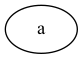

In [33]:
Image('out/0/multi-default.png')

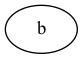

In [34]:
Image('out/1/multi-default.png')